In [605]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [606]:
tr = pd.read_csv('bigmart_train.csv')
test = pd.read_csv('bigmart_test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [607]:
tr.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [608]:
tr['ind']=0
test['ind']=1
df1 = pd.concat([tr, test],ignore_index=True)

In [609]:
df1.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'ind'],
      dtype='object')

In [610]:
df1.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,ind
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,0
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,0
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,0
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,0
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,0


In [611]:
df1.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,ind
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681,0.399958
std,62.086938,1706.499616,0.051459,4.652502,8.371664,0.489907
min,31.290000,33.290000,0.000000,4.555000,1985.000000,0.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000,0.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000,0.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000,1.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,1.000000


In [612]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
ind                          14204 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.4+ MB


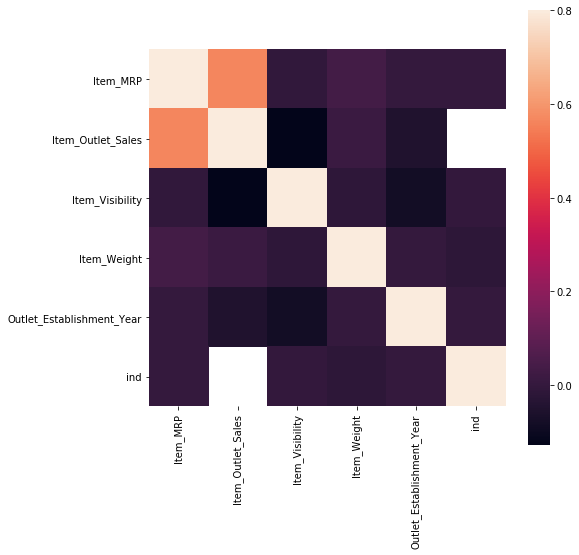

In [613]:
corr_matrix = df1.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, vmax=.8, square=True)

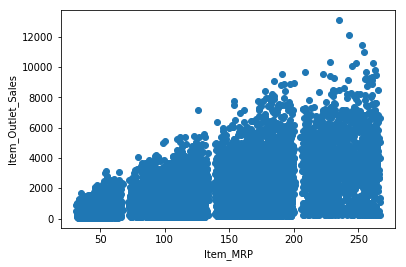

In [614]:
plt.scatter(df1['Item_MRP'],df1['Item_Outlet_Sales'])
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.plot()
plt.show()

In [615]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Here we can see that the Low Fat and low fat and LF all are same, silimarly Reguar and reg is same

In [616]:
# df[].replace will create a new series of values so we need to assign this new column to the correct column name:

df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace(['reg'], 'Regular')
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [617]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [618]:
categorical_col = [x for x in df1.dtypes.index if df1.dtypes[x]=='object']


In [619]:

for col in categorical_col:
    print(col)
    print(df1[col].unique())

Item_Fat_Content
['Low Fat' 'Regular']
Item_Identifier
['FDA15' 'DRC01' 'FDN15' ..., 'NCF55' 'NCW30' 'NCW05']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Size
['Medium' nan 'High' 'Small']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [620]:
df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [621]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [622]:
df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [623]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [624]:
df1['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [625]:
df1.apply(lambda x: x.nunique())

Item_Fat_Content                 2
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
ind                              2
dtype: int64

# Missing values

In [626]:
df1.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
ind                             0
dtype: int64

Item_weight and Outlet_size has missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

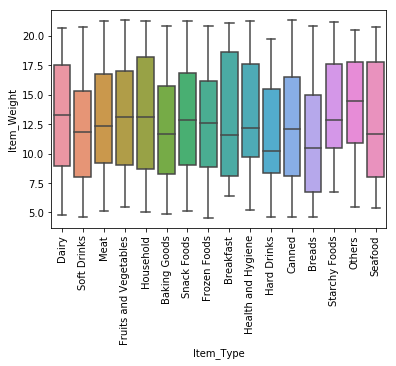

In [627]:
sns.boxplot(df['Item_Type'],df['Item_Weight'])
plt.xticks(rotation='90')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

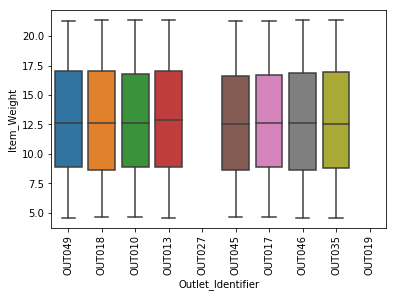

In [628]:
sns.boxplot(tr['Outlet_Identifier'],tr['Item_Weight'])
plt.xticks(rotation='90')

This shows that the outlet 27,19 has not reported any Item_Weight data, only in the train data

In [629]:
#df1 = df1.fillna(0)

In [630]:
df1['Item_Weight'][df1['Item_Identifier']=='NCZ54']


214      14.65
1896       NaN
1969     14.65
2839     14.65
7166       NaN
7738     14.65
7926     14.65
11430    14.65
12830    14.65
13223    14.65
Name: Item_Weight, dtype: float64

In [631]:
df1["Item_Weight"].fillna(df.groupby("Item_Identifier")["Item_Weight"].transform("mean"), inplace=True)

In [632]:
df1[df1["Item_Weight"].isnull()]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,ind


In [633]:
df1.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
ind                             0
dtype: int64

All the Missing data in Item_weight are filled.

In [578]:
out_no = df1['Outlet_Identifier'][df1['Outlet_Size'].isnull()].unique()
out_no

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [579]:
for x in out_no:
    print(x)
    print(df1['Outlet_Size'][df1['Outlet_Identifier']== x].isnull().sum())

OUT010
925
OUT045
1548
OUT017
1543


In [580]:
df1['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

It is observed that the Outlets of 10, 45, 17 didnt provide Outlet_Size

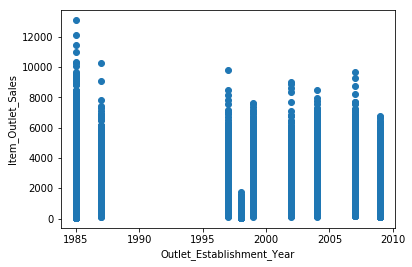

In [581]:
plt.scatter(df1['Outlet_Establishment_Year'],df1['Item_Outlet_Sales'])
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')
plt.plot()
plt.show()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

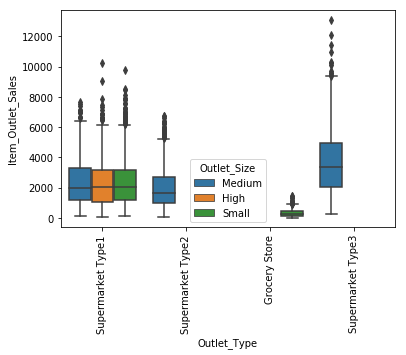

In [582]:
sns.boxplot(x=df1['Outlet_Type'],y=df1['Item_Outlet_Sales'], hue= df1['Outlet_Size'])
plt.xticks(rotation='90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

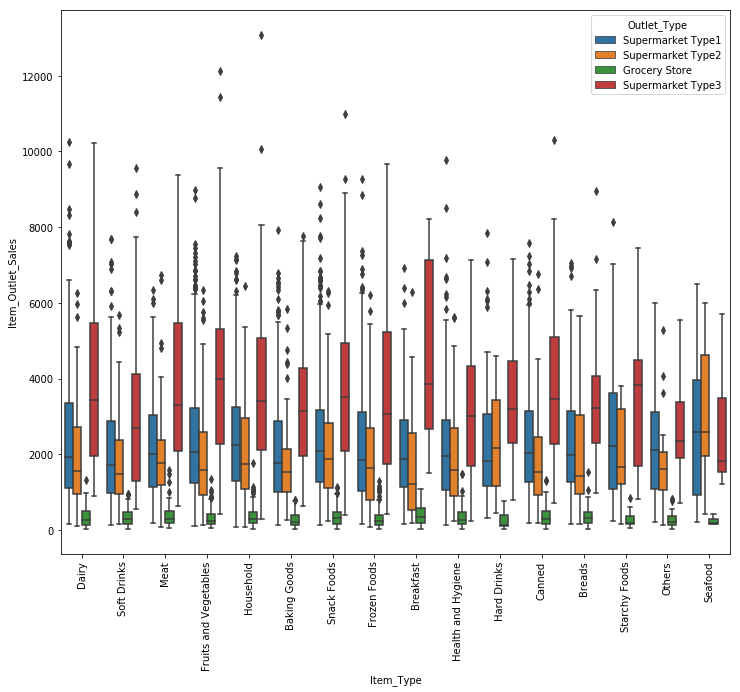

In [583]:
plt.subplots(figsize=(12,10))
sns.boxplot(x=df1['Item_Type'],y=df1['Item_Outlet_Sales'], hue=df1['Outlet_Type'])
plt.xticks(rotation='90')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

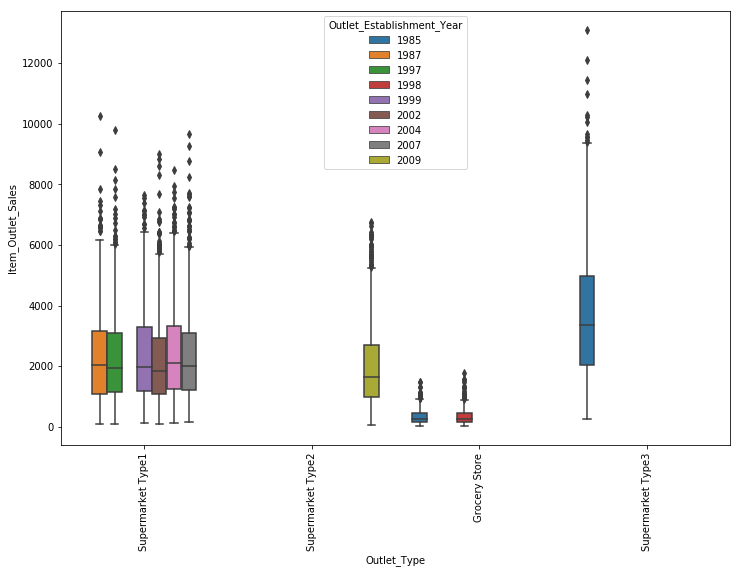

In [584]:
plt.subplots(figsize=(12,8))
sns.boxplot(x=df1['Outlet_Type'],y=df1['Item_Outlet_Sales'],hue=df1['Outlet_Establishment_Year'])
plt.xticks(rotation='90')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

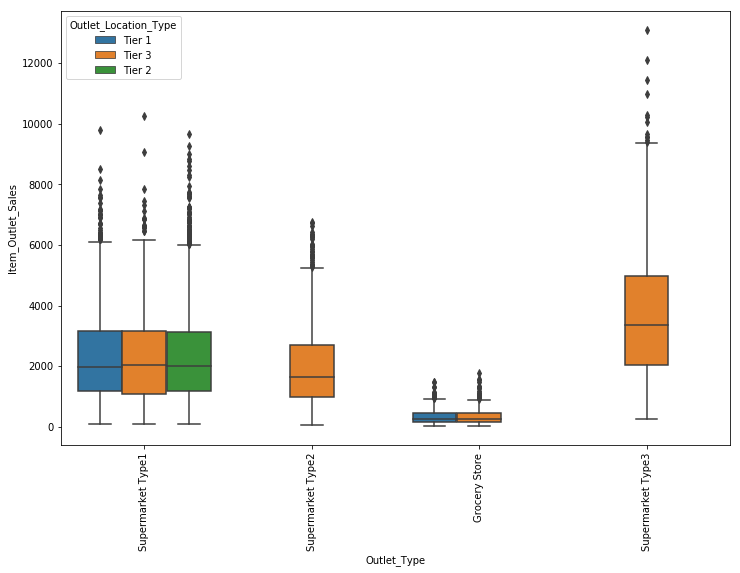

In [642]:

plt.subplots(figsize=(12,8))
sns.boxplot(x= df1['Outlet_Type'],y=df1['Item_Outlet_Sales'],hue=df1['Outlet_Location_Type'])
plt.xticks(rotation='90')

In [585]:
df1['Outlet_Size'][df1['Outlet_Type']== 'Grocery Store'].unique()

array([nan, 'Small'], dtype=object)

From the graphs, we can see that the sales of the Grocery store are less comparitively. Also, we can see that all the grocery stores excluding the misshing values are 'Small'. So we will replace all the 
Outlet size of grocery sroes as Small.

In [586]:
for x in ['Supermarket Type3','Supermarket Type2', 'Supermarket Type1']:
    print(x)
    print(df1['Outlet_Size'][df1['Outlet_Type']==x].unique())

Supermarket Type3
['Medium']
Supermarket Type2
['Medium']
Supermarket Type1
['Medium' 'High' nan 'Small']


Supermarket_type 2, 3 have all the Outlet_size of 'Medium'.
Only Supermarket_Type1 has missing values.

In [587]:
df1['Outlet_Size'][df1['Outlet_Type']== 'Supermarket Type1'].value_counts()

Small     3100
High      1553
Medium    1550
Name: Outlet_Size, dtype: int64

In [588]:
#df1[df1['Outlet_Size'].isnull()]

In [589]:
df1['Outlet_Size'][df1['Outlet_Establishment_Year'] == 2007].unique()

array([nan], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

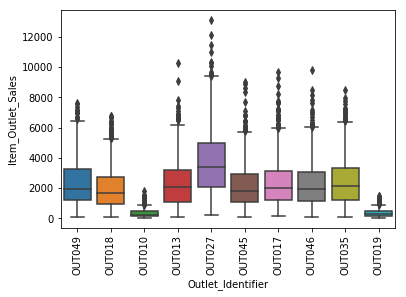

In [644]:
sns.boxplot(df1['Outlet_Identifier'],df1['Item_Outlet_Sales'])
plt.xticks(rotation='90')

In [591]:
# Stores whose sizes are missing
df1['Outlet_Identifier'][df1['Outlet_Size'].isnull()].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

Now we need to fill the missing values of OUT010, OUT045 and OUT017. 
OUT010 is a Grocery Store So, Its 'Small'.

In [592]:
#Size of OUT046 Store
df1['Outlet_Size'][df1['Outlet_Identifier']== 'OUT046'].unique()

array(['Small'], dtype=object)

In [593]:
for x in ['OUT045', 'OUT017', 'OUT046']:
    print(x)
    print(df1['Outlet_Type'][df1['Outlet_Identifier']== x].unique())

OUT045
['Supermarket Type1']
OUT017
['Supermarket Type1']
OUT046
['Supermarket Type1']


We can see that OUT045 and OUT017 have similar sales to that of the OUT046.So,They might have same Outlet_Size, 'Small'. Lets also evaluate other possibilities.

In [594]:
df1['Outlet_Location_Type'][df1['Outlet_Type'] == 'Supermarket Type1'].value_counts()

Tier 2    4641
Tier 1    3100
Tier 3    1553
Name: Outlet_Location_Type, dtype: int64

In [595]:
df1['Outlet_Location_Type'][df1['Outlet_Type'] == 'Supermarket Type3'].value_counts()

Tier 3    1559
Name: Outlet_Location_Type, dtype: int64

In [596]:
#Only Supermarket_Type1 are caregorized under Tier 2. 
#Sizes of Location_Types
for y in ['Tier 1', 'Tier 3', 'Tier 2']:
    print(y)
    print(df1['Outlet_Size'][df1['Outlet_Location_Type']==y].unique())

Tier 1
['Medium' 'Small']
Tier 3
['Medium' nan 'High']
Tier 2
[nan 'Small']


It is observed that Tier 2, Outlet_Size are missing. 
SuperMarket_Type1, Tier 2 might be mostly classified as Small or Medium. Due to above mentioned reasons and as these have less Sales, these stores can be categorizes as 'Small'
So we can replace missing data as 'Small'

In [597]:
df1['Outlet_Size'] = df1['Outlet_Size'].fillna('Small')
df1.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
ind                             0
dtype: int64

All the missing values are treated.